<h1><p style="text-align:center">ColorAI</p></h1>
<p style="text-align:center">By: Mark John A. Velmonte</p>

<p style="text-align: justify;">ColorAi is a type of <span style="font-weight: bold;">simple</span> supervised classification machine learning AI. It can classify what shade of color the given rgb is and can also learn new color base on what the teacher teach it. The performance of this AI will depend on what you teach it. It uses <span style="font-weight: bold;">KNN (K-nearest neighbor) and Random Forest algorithm's </span> to calculate inputs</p>


###### dependencies
1. python3
1. pandas
1. numpy
1. sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
class ColorAI():
    def __init__(self):
        self.trained_data = pd.read_csv("learned_color_data.csv")
        self.number_of_neighbors = 27
    
    
    def help(self):
        print("getColor, showDataFrame, quiz, exam, showExamScore, showQuizScore, teach, showDataMemory, perforamceEval")
    
    
    
    def showDataMemory(self):
        color_name_guide = self.trained_data["Color name"]
        result_color_name = color_name_guide.drop_duplicates()

        color_id = self.trained_data["Id"]
        result_color_id = color_id.drop_duplicates()
        user_guide = pd.DataFrame({"Color family" : result_color_name, "ID" : result_color_id})

        print(user_guide)
    
    
    def perforamceEval(self):
        test_data = self.trained_data

        X = test_data.iloc[:, :-2].values
        y = test_data["Id"]


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

        knn = KNeighborsClassifier(n_neighbors = self.number_of_neighbors)
        knn.fit(X_train, y_train)

        y_pred = knn.predict(X_test)
        
        print(y_pred)
        print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
        

        
    def evaluationTest(self):
        self.evaluation_file = pd.read_csv("evaluate_sheet.csv")
        
        
        score = 0
        number = 0
        for test in self.evaluation_file["given"]:
            given = re.split(", ", test)
            print("givens:", given)
            
            questions = [] 
            for iterarion in given:
                questions.append(int(iterarion))
            
            self.n_test = self.evaluation_file["number"][number]
            number += 1

            self.getColor(questions, self.trained_data, "exam")
            answer_status = input("answer status T / any key:")
            
            if answer_status == "T":
                score += 1
            
        
        print("total score: ", score)
        date = datetime.today().strftime('%Y-%m-%d')
        
        data_to_append = {"score":score, "date":date}
        
        evaluation_score_data = pd.read_csv("evaluation_score.csv")
        new_score_data = evaluation_score_data.append(data_to_append, ignore_index=True)
        
        new_score_data.to_csv("evaluation_score.csv", index = False)
    
        

    
    def getColor(self, color_inp, data_ref, req = "teach"):
        self.data = data_ref

        R = self.data["R"]
        G = self.data["G"]
        B = self.data["B"]

        X = self.data.iloc[:, :-2].values
        y = self.data["Id"]


        model = KNeighborsClassifier(n_neighbors = self.number_of_neighbors)
        model.fit(X, y)


        u_input = color_inp


        prediction = model.predict([u_input])

        self.prediction_index = np.where(self.data == prediction[0])[0][0]
        
        if req == "exam":
            print(self.n_test, "prediction:", self.data["Color name"][self.prediction_index], color_inp)
        if req == "teach":
            print("prediction:", self.data["Color name"][self.prediction_index], color_inp)
        #print("prediction_index:", self.data["Id"][self.prediction_index])

    
    def showDataFrame(self):
        print(self.trained_data)
    
    
    def quiz(self):
        n_test = 5
        n_correct = 0
        
        while n_test != 0:
            n_test -= 1
            
            question = input("test :").split(",")
            
            R = int(question[0])
            G = int(question[1])
            B = int(question[2])
            
            RGB = [R, G, B]
            
            self.getColor(RGB, self.trained_data)

            answer_status = input("answer status :")

            if answer_status == "C":
                n_correct += 1
            
        
            score = n_correct
            
            print("-" * 10 + "page" + "-" * 10)
        
        print("score :", score)
        
        
        new_score = {"Scores" : score}
        
        score_data = pd.read_csv("Scores.csv")
        new_score_data = score_data.append(new_score, ignore_index=True)
        
        new_score_data.to_csv("Scores.csv")
    
    
    
    def exam(self):
        given = pd.read_csv(input("exam sheet:"))
        
        for ask in given["given"]:
            enc_quest = re.split(",", ask)
            
            uinp = []
            for each in enc_quest:
                uinp.append(int(each))
                
            self.getColor(uinp, self.trained_data)
        
        print(given["answer"])
        
        score = int(input("Score:"))
        n_test = int(input("n_test:"))
        data_to_append = {"n_test":n_test, "score":score}
        
        exam_score_data = pd.read_csv("exam_scores.csv")
        new_score_data = exam_score_data.append(data_to_append, ignore_index=True)
        
        new_score_data.to_csv("exam_scores.csv", index = False)
            
    
    def showExamScore(self):
        scores = pd.read_csv("exam_scores.csv")
        print(scores)
        
        plt.plot(scores["score"], "o", color = "orange")
        plt.plot(scores["score"], color = "green")
        plt.show()
        
    
    
    def showQuizScore(self):
        scores = score_data = pd.read_csv("Scores.csv")
        print(scores)
        
        plt.plot(scores["Scores"])
        plt.show()
            
    
    def teach(self):
        teach_status = "T"
        n_test = 0
        n_correct = 0
        n_wrong = 0
        
        while teach_status == "T":
            print("-" * 10 + str(n_test) +"-" * 10)
            
            n_test += 1
            
            uinp = input("color:")
            uinp_enc = re.split(", ", uinp)
            
            RGB = []
            
            for num in uinp_enc:
                RGB.append(int(num))
            
            print(RGB)

            self.getColor(RGB, self.trained_data)

            answer_status = input("answer status C/W:")

            if answer_status == "C":
                n_correct += 1
                
                R = RGB[0]
                G = RGB[1]
                B = RGB[2]
                
                print(R, G, B)
                
                shade_fam = self.data["Color name"][self.prediction_index]
                data_id = self.data["Id"][self.prediction_index]
                new_data = pd.DataFrame({"R":R, "G":G, "B":B, "Color name":shade_fam, "Id":data_id}, index = [0])
                
                self.trained_data = pd.concat([new_data, self.trained_data]).reset_index(drop = True)
                self.trained_data.to_csv("learned_color_data.csv", index=False)
                
                print(new_data)

            if answer_status == "W":
                n_wrong += 1
                
                add_learnings = input("Add New Lesson? Y/N :")
                
                if add_learnings == "Y":
                    
                    self.showDataMemory()
                    
                    shade_fam = input("shader family:")
                    data_id = int(input("new data id:"))
                    new_data = pd.DataFrame({"R":R, "G":G, "B":B, "Color name":shade_fam, "Id":data_id}, index = [0])
                    
                    self.trained_data = pd.concat([new_data, self.trained_data]).reset_index(drop = True)
                    self.trained_data.to_csv("learned_color_data.csv", index=False)
                             
            
            teach_status = input("teaching status T/F:")
            
            if teach_status == "F":
                print("-" * 10 + "teaching ended" + "-" * 10)
                print("number of tests : ", n_test)
                print("correct answer : ", n_correct)
                print("wrong answer : ", n_wrong)
                break
                
                
                
    def imageColor(self, show_plot = False, show_info = False):
        uinp = input("image:")
        
        print("process start")
        
        image_inp = mpimg.imread(uinp)
        image_size = np.array(image_inp)
        image_total_pixel = int((image_inp.shape[2] * image_inp.shape[1] * image_inp.shape[0]))

        dim1 = int(image_total_pixel / 3)

        image_data = image_size.reshape(dim1, 3)

        seq_shape = int((image_inp[0:50].shape[2] * image_inp[0:50].shape[1] * image_inp[0:50].shape[0]) / 3)

        sequence_1 = np.array(image_inp[0:50]).reshape(seq_shape, 3)
        sequence_2 = np.array(image_inp[ int(image_inp.shape[0] / 2): int((image_inp.shape[0] / 2) + 50)]).reshape(seq_shape, 3)
        sequence_3 = np.array(image_inp[ int(image_inp.shape[0] - 50 ): int(image_inp.shape[0])]).reshape(seq_shape, 3)
        
        
        print("---" * 15 + "---" * 15 )
        
        if show_plot == True:
            fig, axs = plt.subplots(3)


            axs[0].imshow(image_inp[0:50])
            axs[1].imshow(image_inp[ int(image_inp.shape[0] / 2): int((image_inp.shape[0] / 2) + 50)])
            axs[2].imshow(image_inp[ int(image_inp.shape[0] - 50 ): int(image_inp.shape[0])])



        readings = np.array([sequence_1, sequence_2, sequence_3])
        tota_pixels = readings.shape[2]* readings.shape[1] * readings.shape[0]

        enc_reading = readings.reshape(int(tota_pixels / 3), 3)




        data = pd.read_csv("learned_color_data.csv")
        R = data["R"]
        G = data["G"]
        B = data["B"]

        feat = np.array([R, G, B])



        data = pd.read_csv("learned_color_data.csv")

        X = data.iloc[:, :-2].values
        y = data["Id"]

        model = RandomForestClassifier(max_depth=100, random_state=0)
        model.fit(X, y)

        prediction = model.predict(enc_reading)
        
        if show_info == True:
            print(prediction)



        result_color_name = pd.DataFrame({"answers" : prediction}).drop_duplicates()

        answers = np.array(result_color_name["answers"])


        turn = 0
        n_total = 0
        ans_arr = []

        for index in answers:
            for pixel in prediction:
                if pixel == answers[turn]:
                    n_total += 1

            turn += 1
            ans_arr.append(n_total)
            n_total -= n_total

            if turn >= answers.shape[0]:
                break

        superior = np.max(ans_arr)
        answer_index = ans_arr.index(superior)

        final_answer_index = answers[answer_index]
        final_answer = np.where(data["Id"] == final_answer_index)[0][0]
        print("Answer:", data["Color name"].iloc[final_answer])

In [4]:
guide = pd.read_csv("learned_color_data.csv")
pd.set_option("display.max_rows", 500)

#### Tutorial:
<p>to teach it use the teach() method (Alice.teach())</p>
<p>to do examination use the exam() method (Alice.exam()). edit the exam_sheet.csv file depend on what given you want</p>

<p>to see all methods use the help() method (Alice.help())</p>

image:images/blue.jpg
process start
------------------------------------------------------------------------------------------
[8 8 8 ... 8 8 8]
Answer: lightblue-shade


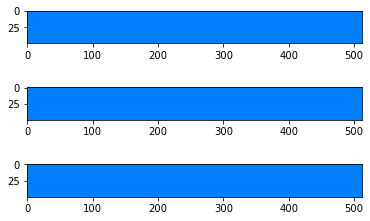

In [12]:
Alice = ColorAI()
Alice.imageColor(show_plot = True, show_info = True)